### Example: Antipodal Signal Detection using Multiple Samples

As consider in Chapter 2, we are dealing with a signal detection problem where we need to decide between two hypotheses based on observed data corrupted by noise. 

Specifically, we're considering **antipodal signals**, meaning the signals under the two hypotheses are negatives of each other. Here's a summary of the given information:

**Signals:**
- Under hypothesis $ H_0 $: $ s_0 = -b $
- Under hypothesis $ H_1 $: $ s_1 = b $
- $ b > 0 $ ensures that $ s_0 $ and $ s_1 $ are indeed antipodal.

**Prior Probabilities:**
- $ \pi_0 = 0.8 $ (probability of $ H_0 $)
- $ \pi_1 = 0.2 $ (probability of $ H_1 $)

**Noise Model:**
- The noise $ \mathbf{n} $ is Gaussian with zero mean and variance $ \sigma^2 $.
- Probability Density Function (pdf) of noise:

  $$
  p_{\mathbf{n}}(n) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{n^2}{2\sigma^2} \right)
  $$

**Extension to Multiple Samples:**
- Instead of a single observation, we have $ k $ independent samples.

### Step 1: Conditional PDFs Extending to $ k $ Independent Samples

Since $ n_i $ is Gaussian with zero mean and variance $ \sigma^2 $, each $ y_i $ conditioned on the hypothesis is also Gaussian:

**Conditional PDFs:**

$$
p(y_i | H_0) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i - (-b))^2}{2\sigma^2} \right) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i + b)^2}{2\sigma^2} \right)
$$

$$
p(y_i | H_1) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i - b)^2}{2\sigma^2} \right)
$$

**Extending to $ k $ Independent Samples**

Assuming that each of the $ k $ samples is **independent**, the joint probability density function (pdf) for all samples under each hypothesis is the product of individual PDFs.

**Under $ H_0 $:**

$$
p(\vec{y} | H_0) = \prod_{i=1}^k p(y_i | H_0) = \prod_{i=1}^k \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i + b)^2}{2\sigma^2} \right)
$$

Simplifying the product:

$$
\begin{align}
p(\vec{y} | H_0) &= \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right)^k \exp\left( -\frac{\sum_{i=1}^k (y_i + b)^2}{2\sigma^2} \right) \\
&= \frac{1}{(2\pi\sigma^2)^{k/2}} \exp\left( -\frac{\sum_{i=1}^k (y_i + b)^2}{2\sigma^2} \right)
\end{align}
$$

**Under $ H_1 $:**

$$
p(\vec{y} | H_1) = \prod_{i=1}^k p(y_i | H_1) = \prod_{i=1}^k \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i - b)^2}{2\sigma^2} \right)
$$

Simplifying similarly:

$$
p(\vec{y} | H_1) = \frac{1}{(2\pi\sigma^2)^{k/2}} \exp\left( -\frac{\sum_{i=1}^k (y_i - b)^2}{2\sigma^2} \right)
$$

### Step 2: Computing the Likelihood Ratio

The **likelihood ratio** $ L(\vec{y}) $ is the ratio of the likelihoods under $ H_1 $ and $ H_0 $:

$$ \boxed{
L(\vec{y}) = \frac{p(\vec{y} | H_1)}{p(\vec{y} | H_0)}
}
$$

Substituting the expressions derived:

$$
L(\vec{y}) = \frac{\frac{1}{(2\pi\sigma^2)^{k/2}} \exp\left( -\frac{\sum_{i=1}^k (y_i - b)^2}{2\sigma^2} \right)}{\frac{1}{(2\pi\sigma^2)^{k/2}} \exp\left( -\frac{\sum_{i=1}^k (y_i + b)^2}{2\sigma^2} \right)}
$$

Simplifying:

$$
L(\vec{y}) = \exp\left( \frac{\sum_{i=1}^k (y_i + b)^2 - \sum_{i=1}^k (y_i - b)^2}{2\sigma^2} \right)
$$

**Simplifying the Exponent**

Let's simplify the exponent:

$$
\sum_{i=1}^k (y_i + b)^2 - \sum_{i=1}^k (y_i - b)^2
$$

Expanding each squared term:

$$
(y_i + b)^2 = y_i^2 + 2by_i + b^2
$$
$$
(y_i - b)^2 = y_i^2 - 2by_i + b^2
$$

Subtracting the two:

$$
(y_i + b)^2 - (y_i - b)^2 = (y_i^2 + 2by_i + b^2) - (y_i^2 - 2by_i + b^2) = 4by_i
$$

Therefore, for all $ k $ samples:

$$
\sum_{i=1}^k (y_i + b)^2 - \sum_{i=1}^k (y_i - b)^2 = \sum_{i=1}^k 4by_i = 4b \sum_{i=1}^k y_i
$$


Substituting back into the expression for $ L(\vec{y}) $:

$$
\boxed{
L(\vec{y}) = \exp\left( \frac{4b \sum_{i=1}^k y_i}{2\sigma^2} \right) = \exp\left( \frac{2b}{\sigma^2} \sum_{i=1}^k y_i \right)
}
$$

#### Log-Likelihood Ratio

Taking the natural logarithm of the likelihood ratio simplifies analysis, especially for threshold-based decision rules.

$$
\boxed{
\ell(\vec{y}) = \ln L(\vec{y}) = \frac{2b}{\sigma^2} \sum_{i=1}^k y_i
}
$$

### Step 3: Make Decision

To make a decision between $ H_0 $ and $ H_1 $, we compare the likelihood ratio (or log-likelihood ratio) to a threshold. 

**Threshold Setting:**

Determine a threshold $ \eta $ using Bayes, MAP, MiniMax, Neyman-Pearson 

One common approach is the **Neyman-Pearson criterion**, which maximizes the probability of detection for a given probability of false alarm $ P_f $.

For example: $ P_f = P(L(\vec{y}) > \eta | H_0) = 0.1 $.

Alternatively, using the log-likelihood ratio:

$$
\ell(\vec{y}) > \ln \eta
$$

**Decision Rule:**
- If $ L(\vec{y}) > \eta $ (or $ \ell(\vec{y}) > \ln \eta $), decide $ H_1 $.
- Otherwise, decide $ H_0 $.

### Neyman-Pearson (NP) Criterion
   
Since there is no information about the cost of different types of errors (i.e., no specified cost for false alarms or missed detections), the **Neyman-Pearson (NP) criterion** is the appropriate choice.

The theoretical derivation of the **Neyman-Pearson threshold ($ \eta_{\text{NP}} $)** and the **probability of detection ($ P_d $)** using the specified parameters:

- Signal Amplitude ($ b $): 0.5
- Noise Standard Deviation ($ \sigma $): 2.0
- Number of Samples ($ k $): 2
- Desired Probability of False Alarm ($ P_f $): 0.1

#### Derivation of the Neyman-Pearson Threshold ($ \eta_{\text{NP}} $)

**Expressing the Log-Likelihood Ratio**

Under both hypotheses, the log-likelihood ratio can be derived as follows:

$$
\ell(\vec{y}) = \ln\left( \frac{p(\vec{y} | H_1)}{p(\vec{y} | H_0)} \right) = \frac{2b}{\sigma^2} \sum_{i=1}^k y_i
$$

Thus, the decision rule becomes:

$$
\frac{2b}{\sigma^2} \sum_{i=1}^k y_i \underset{H_0}{\overset{H_1}{\gtrless}} \ln(\eta_{\text{NP}})
$$

Solving for the sum of observations:

$$
\sum_{i=1}^k y_i \underset{H_0}{\overset{H_1}{\gtrless}} \frac{\sigma^2}{2b} \ln(\eta_{\text{NP}})
$$

Let’s denote the threshold on the sum as $ S_{\text{threshold}} $:

$$ \boxed{
S_{\text{threshold}} = \frac{\sigma^2}{2b} \ln(\eta_{\text{NP}})
}
$$

**Determining $ \eta_{\text{NP}} $ for $ P_f = 0.1 $**

To achieve a desired **Probability of False Alarm ($ P_f $)** of 0.1, we set:

$$
P\left( \sum_{i=1}^k y_i > S_{\text{threshold}} \bigg| H_0 \right) = 0.1
$$

Under $ H_0 $, each $ y_i $ is normally distributed as $ \mathcal{N}(-b, \sigma^2) $. 

Therefore, the sum $ S = \sum_{i=1}^k y_i $ is also normally distributed:

$$
S \sim \mathcal{N}(-k b, k \sigma^2)
$$

**Finding $ S_{\text{threshold}} $**

To find the threshold corresponding to $ P_f = 0.1 $:

**Standardize $ S $:**

$$
Z = \frac{S - (-k b)}{\sigma \sqrt{k}} \sim \mathcal{N}(0, 1)
$$

**Determine the z-score for the upper 10% tail:**

$$
z_{0.1} = \Phi^{-1}(1 - P_f) = \Phi^{-1}(0.9) \approx 1.2816
$$

Where $ \Phi^{-1} $ is the inverse CDF of the standard normal distribution.

**Compute $ S_{\text{threshold}} $:**

$$
S_{\text{threshold}} = \mu_{S|H_0} + z_{0.1} \sigma_{S|H_0} = -k b + z_{0.1} \sigma \sqrt{k}
$$

Substituting the given parameters:

$$
S_{\text{threshold}} = -2 \times 0.5 + 1.2816 \times 2 \times \sqrt{2} \approx -1.0 + 3.6255 = 2.6255
$$

**Solving for $ \eta_{\text{NP}} $**

From the relationship between $ S_{\text{threshold}} $ and $ \eta_{\text{NP}} $:

$$
S_{\text{threshold}} = \frac{\sigma^2}{2b} \ln(\eta_{\text{NP}})
$$

Solving for $ \ln(\eta_{\text{NP}}) $:

$$
\ln(\eta_{\text{NP}}) = \frac{2b}{\sigma^2} \times S_{\text{threshold}} = \frac{2 \times 0.5}{4} \times 2.6255 = \frac{1.0}{4} \times 2.6255 = 0.6564
$$

Therefore:

$$
\boxed{ \eta_{\text{NP}} = \exp(0.6564) \approx 1.928 }
$$

#### Derivation of the Probability of Detection ($ P_d $)


The **Probability of Detection ($ P_d $)** is the likelihood that the test correctly decides $ H_1 $ when $ H_1 $ is true.

$$
P_d = P\left( \sum_{i=1}^k y_i > S_{\text{threshold}} \bigg| H_1 \right)
$$

**Distribution Under $ H_1 $**

Under $ H_1 $, each $ y_i $ is distributed as $ \mathcal{N}(b, \sigma^2) $. Therefore, the sum $ S = \sum_{i=1}^k y_i $ is normally distributed as:

$$
S \sim \mathcal{N}(k b, k \sigma^2)
$$

**Calculating $ P_d $**

To compute $ P_d $, we standardize $ S $ under $ H_1 $:

$$
Z = \frac{S - \mu_{S|H_1}}{\sigma_{S|H_1}} = \frac{S - k b}{\sigma \sqrt{k}} \sim \mathcal{N}(0, 1)
$$

Thus:

$$
P_d = P\left( S > S_{\text{threshold}} \bigg| H_1 \right) = P\left( Z > \frac{S_{\text{threshold}} - k b}{\sigma \sqrt{k}} \right) = 1 - \Phi\left( \frac{S_{\text{threshold}} - k b}{\sigma \sqrt{k}} \right)
$$

**Substituting $ S_{\text{threshold}} $**

Given:

$$
S_{\text{threshold}} = 2.6255
$$

And:

$$
k = 2, \quad b = 0.5, \quad \sigma = 2.0
$$

Calculate the standardized value:

$$
\frac{S_{\text{threshold}} - k b}{\sigma \sqrt{k}} = \frac{2.6255 - 2 \times 0.5}{2 \times \sqrt{2}} = \frac{2.6255 - 1.0}{2.8284} \approx \frac{1.6255}{2.8284} \approx 0.5745
$$

Thus:

$$
\boxed{
P_d = 1 - \Phi(0.5745) \approx 1 - 0.7163 = 0.2837
}
$$

### Numerical Results

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# ===============================
# 1. Define Parameters
# ===============================

# Signal parameters
b = 0.5          # Reduced Signal amplitude
sigma = 2.0      # Increased Noise standard deviation
k = 2            # Number of samples

# Prior probabilities
pi_0 = 0.8       # Probability of H0
pi_1 = 0.2       # Probability of H1

# Desired probability of false alarm
P_f_desired = 0.1

# Number of simulations
N_simulations = 100000

# ===============================
# 2. Theoretical Threshold (eta_NP)
# ===============================

# Critical z-value for P_f = 0.1
z_Pf = norm.ppf(1 - P_f_desired)  # Approximately 1.2816 for P_f=0.1

# Compute the threshold sum S_threshold
mu_H0 = -k * b
sigma_H0 = sigma * np.sqrt(k)
S_threshold = mu_H0 + z_Pf * sigma_H0  # Threshold under H0

# Compute ln(eta_NP ) using the decision rule
# ln(eta_NP ) = (2b / sigma^2) * S_threshold
ln_eta_NP_theoretical = (2 * b / sigma**2) * S_threshold

# Theoretical threshold
eta_NP_theoretical = np.exp(ln_eta_NP_theoretical)

print(f"Theoretical ln(eta_NP): {ln_eta_NP_theoretical:.4f}")
print(f"Theoretical eta_NP: {eta_NP_theoretical:.4f}")

# ===============================
# 3. Simulate Observations Under H0 and H1
# ===============================

# Generate noise for H0 and H1
noise_H0 = np.random.normal(loc=0, scale=sigma, size=(N_simulations, k))
noise_H1 = np.random.normal(loc=0, scale=sigma, size=(N_simulations, k))

# Generate observations under H0 and H1
Y_H0 = -b + noise_H0
Y_H1 = b + noise_H1

# ===============================
# 4. Compute Log-Likelihood Ratios
# ===============================

# Compute the sum of observations for each simulation
S_H0 = np.sum(Y_H0, axis=1)
S_H1 = np.sum(Y_H1, axis=1)

# Compute log-likelihood ratios
ell_H0 = (2 * b / sigma**2) * S_H0
ell_H1 = (2 * b / sigma**2) * S_H1

# ===============================
# 5. Determine Empirical Threshold (eta_NP)
# ===============================

# Find the empirical threshold based on H0 simulations
ell_threshold_empirical = np.percentile(ell_H0, 90)  # 90th percentile for P_f=0.1

# Empirical eta_NP
eta_NP_empirical = np.exp(ell_threshold_empirical)

print(f"Empirical log-likelihood ratio threshold: {ell_threshold_empirical:.4f}")
print(f"Empirical eta_NP: {eta_NP_empirical:.4f}")

# ===============================
# 6. Compute Empirical Probability of Detection (P_d)
# ===============================

# Compute P_d
P_d_empirical = np.mean(ell_H1 > ell_threshold_empirical)

print(f"Empirical Probability of Detection P_d: {P_d_empirical:.4f}")

# ===============================
# 7. Compute Theoretical Probability of Detection (P_d)
# ===============================

# Theoretical P_d calculation
# Under H1, S ~ N(k b, k sigma^2 )
mu_H1 = k * b
sigma_H1 = sigma * np.sqrt(k)

# Compute P_d = P(S > S_threshold | H1 )
z = (S_threshold - mu_H1) / sigma_H1
P_d_theoretical = 1 - norm.cdf(z)

print(f"Theoretical Probability of Detection P_d: {P_d_theoretical:.4f}")


Theoretical ln(eta_NP): 0.6562
Theoretical eta_NP: 1.9274
Empirical log-likelihood ratio threshold: 0.6600
Empirical eta_NP: 1.9347
Empirical Probability of Detection P_d: 0.2802
Theoretical Probability of Detection P_d: 0.2828


### Real-World Application Example

**Scenario: Signal Detection in Wireless Communication**

Context:

- Purpose: Determine whether a specific signal is present in the received wireless data.
- Application: Deciding whether a user is transmitting data ($ H_1 $) or not ($ H_0 $).

Given Parameters:

- Signal Amplitude ($ b $): 0.5 (represents signal strength)
- Noise Standard Deviation ($ \sigma $): 2.0 (represents environmental noise)
- Number of Samples ($ k $): 2 (e.g., two consecutive data packets)
- Desired False Alarm Rate ($ P_f $): 0.1 (10% chance of falsely detecting a signal)

Decision Process:

1. Receive Data Samples:
   - Suppose two data packets are received with signal measurements $ y_1 $ and $ y_2 $.

2. Compute the Log-Likelihood Ratio:

   - Using the formula:
     $$
     \ell(\vec{y}) = 0.25 \times (y_1 + y_2)
     $$
   
3. Apply the Threshold:
   - Compare $ \ell(\vec{y}) $ with $ \ln(\eta_{\text{NP}}) \approx 0.6564 $.

4. Make a Decision:
   - If $ \ell(\vec{y}) > 0.6564 $: Decide $ H_1 $ (User is transmitting data).
   - Else: Decide $ H_0 $ (No data transmission).


##### Example 1: Deciding $ H_1 $ (Signal Present)

Given:

- Observed Samples:
  - $ y_1 = 2.0 $
  - $ y_2 = 3.0 $

Steps:

1. Compute the Sum of Observations:

   $$
   S = y_1 + y_2 = 2.0 + 3.0 = 5.0
   $$

2. Calculate the Log-Likelihood Ratio ($ \ell(\vec{y}) $):

   $$
   \ell(\vec{y}) = 0.25 \times 5.0 = 1.25
   $$

3. Compare with the Threshold $ \ln(\eta_{\text{NP}}) $:
   - Given $ \eta_{\text{NP}} \approx 1.928 $, calculate $ \ln(\eta_{\text{NP}}) $:

     $$
     \ln(1.928) \approx 0.6564
     $$

   - Check if $ \ell(\vec{y}) > 0.6564 $:

     $$
     1.25 > 0.6564 \quad \text{(True)}
     $$

4. Decision:
   - Since $ \ell(\vec{y}) > \ln(\eta_{\text{NP}}) $, decide $ H_1 $ (signal is present).

Interpretation:

- The sum of the observations is sufficiently large to exceed the threshold, indicating the presence of the signal.


##### Example 2: Deciding $ H_0 $ (No Signal)

Given:

- Observed Samples:
  - $ y_1 = -1.0 $
  - $ y_2 = 0.0 $

Steps:

1. Compute the Sum of Observations:

   $$
   S = y_1 + y_2 = -1.0 + 0.0 = -1.0
   $$

2. Calculate the Log-Likelihood Ratio ($ \ell(\vec{y}) $):

   $$
   \ell(\vec{y}) = 0.25 \times (-1.0) = -0.25
   $$

3. Compare with the Threshold $ \ln(\eta_{\text{NP}}) $:
   - Given $ \ln(\eta_{\text{NP}}) \approx 0.6564 $, check if $ \ell(\vec{y}) > 0.6564 $:

     $$
     -0.25 > 0.6564 \quad \text{(False)}
     $$

4. Decision:
   - Since $ \ell(\vec{y}) \leq \ln(\eta_{\text{NP}}) $, decide $ H_0 $ (no signal is present).

Interpretation:

- The sum of the observations does not exceed the threshold, suggesting that there is no significant signal present.


##### Example 3: Edge Case Near the Threshold

Given:

- Observed Samples:
  - $ y_1 = 1.0 $
  - $ y_2 = 1.0 $

Steps:

1. Compute the Sum of Observations:

   $$
   S = y_1 + y_2 = 1.0 + 1.0 = 2.0
   $$

2. Calculate the Log-Likelihood Ratio ($ \ell(\vec{y}) $):

   $$
   \ell(\vec{y}) = 0.25 \times 2.0 = 0.5
   $$

3. Compare with the Threshold $ \ln(\eta_{\text{NP}}) $:
   - Given $ \ln(\eta_{\text{NP}}) \approx 0.6564 $, check if $ \ell(\vec{y}) > 0.6564 $:
   
     $$
     0.5 > 0.6564 \quad \text{(False)}
     $$

4. Decision:
   - Since $ \ell(\vec{y}) \leq \ln(\eta_{\text{NP}}) $, decide $ H_0 $ (no signal is present).

Interpretation:

- The sum of the observations is slightly below the threshold, resulting in a decision in favor of $ H_0 $.

In [6]:
import numpy as np
from scipy.stats import norm

# ===============================
# 1. Define Parameters
# ===============================

# Signal parameters
b = 0.5          # Signal amplitude
sigma = 2.0      # Noise standard deviation
k = 2            # Number of samples

# Desired probability of false alarm
P_f_desired = 0.1

# Neyman-Pearson Threshold (from previous derivation)
eta_NP = 1.928
ln_eta_NP = np.log(eta_NP)  # Approximately 0.6564

# ===============================
# 2. Example Observations
# ===============================

# Define observed samples
# Example 1: Decide H1
y1_H1 = 2.0
y2_H1 = 3.0

# Example 2: Decide H0
y1_H0 = -1.0
y2_H0 = 0.0

# Example 3: Edge Case
y1_edge = 1.0
y2_edge = 1.0

# ===============================
# 3. Compute Log-Likelihood Ratios
# ===============================

def compute_log_likelihood_ratio(y1, y2, b, sigma, k):
    S = y1 + y2
    ell = (2 * b / sigma**2) * S
    return ell

# Compute for Example 1
ell_H1 = compute_log_likelihood_ratio(y1_H1, y2_H1, b, sigma, k)
print(f"Example 1: Observations = ({y1_H1}, {y2_H1})")
print(f"Log-Likelihood Ratio (ell) = {ell_H1:.4f}")
print(f"Decision: {'H1' if ell_H1 > ln_eta_NP else 'H0'}\n")

# Compute for Example 2
ell_H0 = compute_log_likelihood_ratio(y1_H0, y2_H0, b, sigma, k)
print(f"Example 2: Observations = ({y1_H0}, {y2_H0})")
print(f"Log-Likelihood Ratio (ell) = {ell_H0:.4f}")
print(f"Decision: {'H1' if ell_H0 > ln_eta_NP else 'H0'}\n")

# Compute for Example 3
ell_edge = compute_log_likelihood_ratio(y1_edge, y2_edge, b, sigma, k)
print(f"Example 3: Observations = ({y1_edge}, {y2_edge})")
print(f"Log-Likelihood Ratio (ell) = {ell_edge:.4f}")
print(f"Decision: {'H1' if ell_edge > ln_eta_NP else 'H0'}\n")


Example 1: Observations = (2.0, 3.0)
Log-Likelihood Ratio (ell) = 1.2500
Decision: H1

Example 2: Observations = (-1.0, 0.0)
Log-Likelihood Ratio (ell) = -0.2500
Decision: H0

Example 3: Observations = (1.0, 1.0)
Log-Likelihood Ratio (ell) = 0.5000
Decision: H0



<Figure size 1000x800 with 0 Axes>

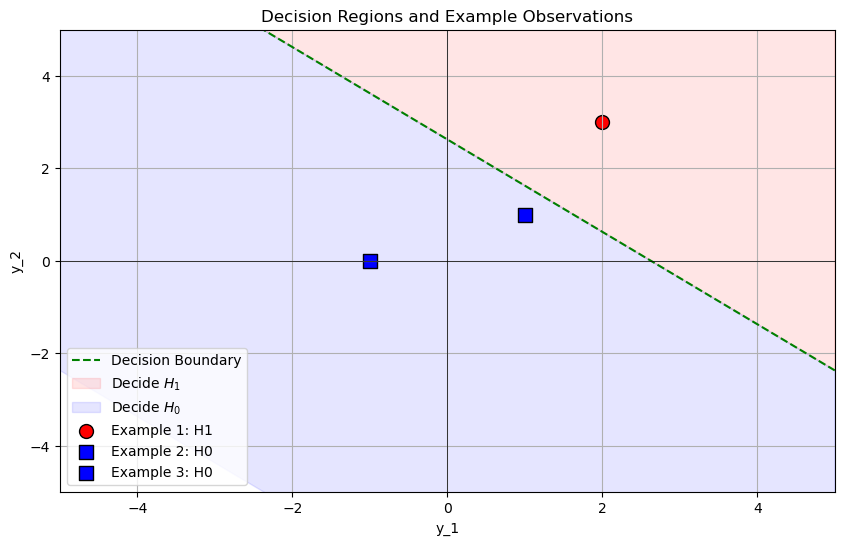

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# 1. Define Parameters
# ===============================

# Signal parameters
b = 0.5          # Signal amplitude
sigma = 2.0      # Noise standard deviation
k = 2            # Number of samples

# Neyman-Pearson Threshold
eta_NP = 1.928
ln_eta_NP = np.log(eta_NP)  # Approximately 0.6564

# Decision boundary calculation:
# ln(eta_NP) = (2b / sigma^2) * (y1 + y2)
# => y2 = (ln(eta_NP) * sigma^2) / (2b) - y1
y2_intercept = (ln_eta_NP * sigma**2) / (2 * b)
# So, y2 = y2_intercept - y1

# ===============================
# 2. Define Decision Boundary
# ===============================

def decision_boundary(y1):
    return y2_intercept - y1

# ===============================
# 3. Define Observations
# ===============================

observations = {
    'Example 1: H1': {'y1': 2.0, 'y2': 3.0, 'decision': 'H1'},
    'Example 2: H0': {'y1': -1.0, 'y2': 0.0, 'decision': 'H0'},
    'Example 3: H0': {'y1': 1.0, 'y2': 1.0, 'decision': 'H0'}
}

# ===============================
# 4. Create Plot
# ===============================

plt.figure(figsize=(10, 8))

# Define range for y1
y1_values = np.linspace(-5, 5, 400)
y2_values = decision_boundary(y1_values)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.plot(y1_values, y2_values, 'g--', label='Decision Boundary')

# Fill regions
plt.fill_between(y1_values, y2_values, y2_values + 10, color='red', alpha=0.1, label='Decide $H_1$')
plt.fill_between(y1_values, y2_values, y2_values - 10, color='blue', alpha=0.1, label='Decide $H_0$')

# Plot observations
for label, obs in observations.items():
    y1 = obs['y1']
    y2 = obs['y2']
    decision = obs['decision']
    if decision == 'H1':
        color = 'red'
        marker = 'o'
    else:
        color = 'blue'
        marker = 's'
    plt.scatter(y1, y2, color=color, edgecolor='k', s=100, marker=marker, label=label)

# Prevent duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Labels and Title
plt.title('Decision Regions and Example Observations')
plt.xlabel('y_1')
plt.ylabel('y_2')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(by_label.values(), by_label.keys(), loc='lower left')

plt.show()
